In [14]:
# import the packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the file and assigning X, y
def readFile(file_path):
    dataset = pd.read_csv(file_path)
    X = dataset.iloc[:,0].values # Land Area (sqft)
    y = dataset.iloc[:,1].values # Purchase Price ($M)
    return X, y, dataset

file_path = r'data/landprice.csv'
X, y, df = readFile(file_path)

df.head()

,Area of Land in Thousand Sq Foot,Price of Land in Million USD
0,91,12.0
1,66,7.0
2,72,8.0
3,73,8.1
4,60,7.0


In [3]:
# splitting the data
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

In [4]:
# training the model
def model_train(X_train, y_train, X_test, y_test):
    
    X_train1 = np.reshape(X_train, (-1, 1))
    y_train1 = np.reshape(y_train, (-1, 1))

    X_test1 = np.reshape(X_test, (-1, 1))
    y_test1 = np.reshape(y_test, (-1, 1))
    
    lin_regressor = LinearRegression()
    lin_regressor.fit(X_train1, y_train1)

    y_pred = lin_regressor.predict(X_test1)

    return y_pred


y_pred = model_train(X_train, y_train, X_test, y_test)


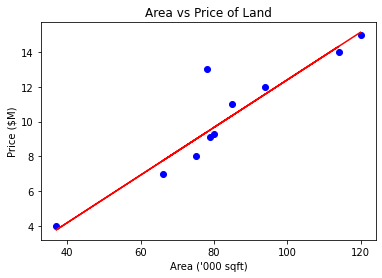

In [13]:
# visualizing the analysis
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Area vs Price of Land')
plt.xlabel("Area ('000 sqft)")
plt.ylabel('Price ($M)')

plt.show()

In [18]:
# determining the r_squared value for testing data
r_square = r2_score(y_test, y_pred)
print(r_square)

0.8505174170816574
